## Assignment of Lecture 04

In this week, we need complete following tasks:
+ Re-review the course online programming; 
+ Choose 1 - 2 books which you interested and keep reading; 
+ Answer the review questions
+ Prepare the basic requirement of our 1st project. 

### Part I Review the online programming. 

In [1]:
original_prices = [1,5, 8, 9, 10, 17, 17, 20, 24, 30]
from collections import defaultdict
price = defaultdict(int)

In [2]:
for i,p in enumerate(original_prices):
    price[i+1]=p

In [3]:
price[132]

0

In [4]:
import time
def call_time(func_1,arg):
    start=time.time()
    func_1(arg)
    print('used time: {}'.format(time.time()-start))

引入函数装饰器的概念，一个函数可以去修饰一群函数

In [5]:
def get_call_time(func):
    def _wrap(arg):
        start=time.time()
        result=func(arg)
        print('used time: {}'.format(time.time()-start))
        return result
    return _wrap

In [6]:
from functools import lru_cache

In [7]:
solution  = {}
@lru_cache(maxsize=2*100*100)
def r(n):
    max_price, split_point = max(
        [(price[n],0)]+[(r(i)+r(n-i),i) for i in range (1,n)],key = lambda x:x[0]
    )
    solution[n]=(split_point,n-split_point)
    return max_price

In [8]:
r(557)


1668

In [9]:
aaa=get_call_time(r)

In [10]:
aaa(999)

used time: 0.2109997272491455


2995

In [11]:
def not_cut(split):return split==0

def parse_solution(target_length,revenue_solution):
    left,right = revenue_solution[target_length]
    if not_cut(left):return [right]
    
    return parse_solution(left,revenue_solution)+(parse_solution(right,revenue_solution))


In [12]:
parse_solution(55,solution)

[2, 3, 10, 10, 10, 10, 10]

### Part1-2: Finish the Solution Parse Part of Edit-Distance

In [13]:
from functools import lru_cache

class Edit_Distance():
    
    def __init__(self,input_a,input_b):
        self.input_a = input_a
        self.input_b = input_b
        self.distance = 0
        self.solution_Edit_Dis = {}
        self.result = []
    def get_solution(self):
        self.distance = self.edit_distance(self.input_a,self.input_b)
        print('Distance is {}'.format(self.distance))
        return 
    
    def show_solution(self):
        print('Solution set is as follow:')
        for v,k in self.solution_Edit_Dis.items():
                print('{v}:{k}'.format(v = v, k = k))
        return 
        #return result
        
    def parse_solution(self,left_input,right_input):
        if len(left_input)==0:return len(right_input)
        if len(right_input)==0:return len(left_input)
        
        tail_s1=left_input[-1]
        tail_s2=right_input[-1]
        temp = self.solution_Edit_Dis[(left_input, right_input)]
        if temp=='':
            return self.parse_solution(left_input[:-1],right_input[:-1])
        if 'DEL' in temp:
            self.result.append(temp)
            return self.parse_solution(left_input[:-1],right_input)
        if 'ADD' in temp:
            self.result.append(temp)
            return self.parse_solution(left_input,right_input[:-1])
        if 'SUB' in temp:
            self.result.append(temp)
            return self.parse_solution(left_input[:-1],right_input[:-1])
        return
    
    
    @lru_cache(maxsize=2**10)
    def edit_distance(self,string1,string2):

        #一边到头了的情况
        if len(string1)==0:return len(string2)
        if len(string2)==0:return len(string1)

        #取最后一位，作为要增减的部分。
        tail_s1=string1[-1]
        tail_s2=string2[-1]
        candidates = [
            ( self.edit_distance(string1[:-1],string2)+1,'DEL {}'.format(tail_s1)),
            ( self.edit_distance(string1,string2[:-1])+1,'ADD {}'.format(tail_s2)),
        ]
        if tail_s1==tail_s2:
            both_forward = (self.edit_distance(string1[:-1],string2[:-1])+0,'')
        else:
            both_forward = (self.edit_distance(string1[:-1],string2[:-1])+2,'SUB {} => {}'.format(tail_s1,tail_s2))

        candidates.append(both_forward)

        min_distance, operation = min(candidates, key=lambda x: x[0])

        self.solution_Edit_Dis[(string1, string2)] = operation 

        return min_distance             


In [14]:
test1=Edit_Distance('ATCGGAA','ATCGGGA')
test1.get_solution()
#test1.show_solution()
test1.parse_solution(test1.input_a,test1.input_b)
print(test1.result)

Distance is 2
['DEL A', 'ADD G']


### Part 2 Choose 1 - 2 books to keep reading: 

+ Introduction to Algorithms 
+ Artificial Intelligence A Modern Approach (3rd Edition) 
+ Programming Pearls 


> most books you may find in our github: https://github.com/Computing-Intelligence/References

### Part 3: Answer following questions: 

1. Why do we need dynamic programming? What's the difference of dynamic programming and previous talked `search` problme? 

Ans: 我们遇到复杂问题时，我们将其分解成多个子问题，一一求解并记录；在子问题重复出现时，即可使用之前的结果直接得出结论，无需更多的计算。

    不同在于，动态规划先找出复杂问题与子问题之间的联系后，求解子问题，组合成答案；搜索方法则是按照一定算法不断递归，一直寻找直到找到结果为止。

2. Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the `right` answer based on inputs?

Ans: 动态规划可快速解决不太复杂的问题，无需数据集训练验证等繁琐的过程。

3. Can you catch up at least 3 problems which could solved by Dynamic Programming? 

Ans: 二分查找树，最短路径，论文查重。

4. Can you catch up at least 3 problems wich could sloved by Edit Distance? 

Ans: 论文查重，错别字修改。想不到了Orz

5. Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature. 

Ans: 寻找子问题关系，子问题结果储存，查表。

    1. 不断递归的查找子问题与复杂问题之间的联系
    2. 在过程中储存子问题的解决结果
    3. 在后面解决类似问题时直接查表得出结果。

6. What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)

Ans: 空间换时间的一种算法，空间要求较高。对于高维度的问题不能很好地解决。

## Part 4 Preparation of Project-01，之前完成过个人网站的相关项目，不是大问题，最近毕设比较忙就留到五月中再整

1. Using python Flask or Bottle to finish your first simple web app:
> https://bottlepy.org/

2. Learn what's the SQL, and try some simple SQL operations:
> https://www.w3schools.com/sql/sql_intro.asp

3. Learn what's the HTML ( *ONLY* need to know the basic things)
> https://getbootstrap.com/; https://www.w3schools.com/html/

### (Optinal) Finish the k-person-salesman problem:

In [15]:
import random
import matplotlib.pylab as plt

In [16]:
latitudes = [random.randint(-100, 100) for _ in range(21)]
longitude = [random.randint(-100, 100) for _ in range(21)]

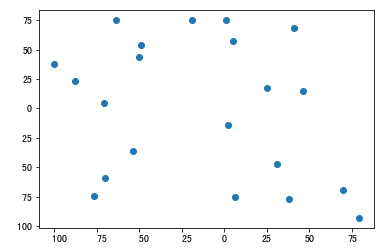

In [17]:
plt.scatter(latitudes, longitude)

给定一个初始点 $P$, 已经 $k$个车辆，如何从该点出发，经这 k 个车辆经过所以的点全部一次，而且所走过的路程最短? 

例如： 

In [18]:
chosen_p = (5, 10)

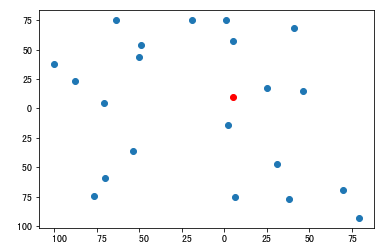

In [19]:
plt.scatter(latitudes, longitude)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')

In [20]:
coordinates_point=list()
point_code = {}
point_code[0]=chosen_p
for i in range(len(latitudes)):
    point_code[i+1]=(latitudes[i], longitude[i])
point_code

{0: (5, 10),
 1: (46, 15),
 2: (6, -75),
 3: (-49, 54),
 4: (-50, 44),
 5: (5, 57),
 6: (70, -69),
 7: (41, 68),
 8: (-88, 23),
 9: (2, -14),
 10: (1, 75),
 11: (-71, 5),
 12: (25, 17),
 13: (-54, -36),
 14: (-64, 75),
 15: (79, -93),
 16: (-19, 75),
 17: (-70, -59),
 18: (38, -77),
 19: (31, -47),
 20: (-100, 38),
 21: (-77, -74)}

目前这里有20个点加随机起始点则为21个点，我们为他们附上相应的代号{1-21}，并建立大地图，对每个点与另外的20个点求出一张距离图。

In [21]:
import math

map_list = list()
for code,points in point_code.items():
    dis_map={}
    for code_in,points_in in point_code.items():
        
        if code==code_in:
            continue
        dis_map[code_in] = int(math.sqrt(pow(points_in[0]-points[0],2)+pow(points_in[1]-points[1],2)))
    sorted(dis_map.items(),key=lambda item:item[1])
    map_list.append(dis_map)

这里的思路是当K=1的时候使用贪婪算法解决Orz，想不出别的了

In [22]:
temp = map_list
visited_list = [0] * len(map_list)
visited_list[0]=1
path=[]
now_place = 0
distance = 0
while True:
    if 0 in visited_list:
        now_full_map = temp[now_place]
        
        path.append(now_place)
        for counter,i in enumerate(visited_list): 
            if i==1 and counter in now_full_map:
                    del now_full_map[counter]

        
        now_map = sorted(now_full_map.items(),key=lambda item:item[1])
        if(len(now_map)==0):
            break
        visited_list[now_place]=1
        now_place=now_map[0][0]
        distance+=now_map[0][1]
        
    else:
        break

In [26]:
print('->'.join(str(p) for p in path))  
print('\n')
print('->'.join(str(point_code[p]) for p in path))   
print('\n')
print('Total distance is: {}'.format(distance))

0->12->1->9->19->18->2->6->15->13->17->21->11->8->20->4->3->14->16->10->5->7


(5, 10)->(25, 17)->(46, 15)->(2, -14)->(31, -47)->(38, -77)->(6, -75)->(70, -69)->(79, -93)->(-54, -36)->(-70, -59)->(-77, -74)->(-71, 5)->(-88, 23)->(-100, 38)->(-50, 44)->(-49, 54)->(-64, 75)->(-19, 75)->(1, 75)->(5, 57)->(41, 68)


Total distance is: 803
